# Money Maker 3000
## A stock forcastor by Darrin Miller and Riley Primeau

# Step 1: Enviorment Setup

In [63]:
# Create conda enviorment for model
"""
! conda create --name MM3000n
! conda activate MM3000
! conda install pandas
! conda install scikit-learn
! conda install -c conda-forge yfinance
! conda install -c anaconda pandas-datareader
! conda install jupyter
! conda install matplotlib
! conda install -c conda-forge xgboost
! conda install seaborn
"""

'\n! conda create --name MM3000n\n! conda activate MM3000\n! conda install pandas\n! conda install scikit-learn\n! conda install -c conda-forge yfinance\n! conda install -c anaconda pandas-datareader\n! conda install jupyter\n! conda install matplotlib\n! conda install -c conda-forge xgboost\n! conda install seaborn\n'

# Step 2: Data Retrieval

In [64]:
from pandas_datareader import data as pdr
from datetime import date, timedelta
import yfinance as yf
import pandas as pd
from importlib import reload # for reloading helper functions after changes
import matplotlib.pyplot as plt
import helper_functions as helper

In [65]:
#Get Stock info from Yahoo Finance
yf.pdr_override()
ticker_symbol = 'AAPL'
start_date = "2015-01-01"
end_date = "2023-04-01"
yesterday = date.today() - timedelta(days=1) #end date set to yesterday because todays data my not be in
data = pdr.get_data_yahoo(ticker_symbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2076 entries, 2015-01-02 to 2023-03-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2076 non-null   float64
 1   High       2076 non-null   float64
 2   Low        2076 non-null   float64
 3   Close      2076 non-null   float64
 4   Adj Close  2076 non-null   float64
 5   Volume     2076 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 113.5 KB


# Step 3: Preprocessing

## Adding additional features
### Daily Return feature

In [67]:
#create feature for daily return
data['daily_ret'] = 100.0 * ((data['Adj Close'] / data['Adj Close'].shift(1)) - 1)
data['daily_ret'].fillna(0, inplace=True)

### Simple Moving Average for 7, 30, 50, 100 days

In [68]:
helper.get_set_sma(data)
data.dropna(inplace=True)

In [69]:
#Check null values
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
daily_ret    0
sma_7        0
sma_30       0
sma_50       0
dtype: int64

In [70]:
data

,Open,High,Low,Close,Adj Close,Volume,daily_ret,sma_7,sma_30,sma_50
Date,,,,,,,,,,
2015-03-16,30.969999,31.237499,30.717501,31.237499,28.186207,143497200,1.100415,28.148502,28.338000,26.946952
2015-03-17,31.475000,31.830000,31.412500,31.760000,28.657663,204092400,1.672650,28.162680,28.404744,27.028792
2015-03-18,31.750000,32.290001,31.592501,32.117500,28.980249,261083600,1.125654,28.205541,28.482091,27.130924
2015-03-19,32.187500,32.312500,31.850000,31.875000,28.761433,183238000,-0.755055,28.301895,28.545329,27.228635
2015-03-20,32.062500,32.099998,31.290001,31.475000,28.400509,274780400,-1.254888,28.419843,28.590144,27.312431
...,...,...,...,...,...,...,...,...,...,...
2023-03-27,159.940002,160.770004,157.869995,158.279999,158.279999,52390300,-1.229330,158.138569,152.532667,149.289207
2023-03-28,157.970001,158.490005,155.979996,157.649994,157.649994,45992200,-0.398032,158.517140,152.659333,149.751116
2023-03-29,159.369995,161.050003,159.350006,160.770004,160.770004,51305700,1.979074,158.998570,152.911667,150.251861


# Intial Tests

Adjusted Close model with 7 days of prev adj close and 1 day prediction

In [71]:
X1 = data['Adj Close'].values.tolist()
X1 = helper.series_to_supervised(X1,5)
X1

,var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
5,28.186207,28.657663,28.980249,28.761433,28.400509,28.696014
6,28.657663,28.980249,28.761433,28.400509,28.696014,28.578712
7,28.980249,28.761433,28.400509,28.696014,28.578712,27.832045
8,28.761433,28.400509,28.696014,28.578712,27.832045,28.026043
9,28.400509,28.696014,28.578712,27.832045,28.026043,27.802723
...,...,...,...,...,...,...
2022,157.399994,159.279999,157.830002,158.929993,160.250000,158.279999
2023,159.279999,157.830002,158.929993,160.250000,158.279999,157.649994
2024,157.830002,158.929993,160.250000,158.279999,157.649994,160.770004
2025,158.929993,160.250000,158.279999,157.649994,160.770004,162.360001


Adjusted Close model with 7 days of all features and 1 day prediction

In [72]:
target = helper.series_to_supervised(data['Adj Close'].values.tolist(),5)
target = target['var1(t)']
X2 = helper.series_to_supervised(data,5,0)
X2['var1(t)']= target.values
X2

,var1(t-5),var2(t-5),var3(t-5),var4(t-5),var5(t-5),var6(t-5),var7(t-5),var8(t-5),var9(t-5),var10(t-5),...,var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var1(t)
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-23,30.969999,31.237499,30.717501,31.237499,28.186207,143497200.0,1.100415,28.148502,28.338000,26.946952,...,32.099998,31.290001,31.475000,28.400509,274780400.0,-1.254888,28.419843,28.590144,27.312431,28.696014
2015-03-24,31.475000,31.830000,31.412500,31.760000,28.657663,204092400.0,1.672650,28.162680,28.404744,27.028792,...,31.962500,31.629999,31.802500,28.696014,150838800.0,1.040494,28.508785,28.652404,27.383533,28.578712
2015-03-25,31.750000,32.290001,31.592501,32.117500,28.980249,261083600.0,1.125654,28.205541,28.482091,27.130924,...,32.009998,31.639999,31.672501,28.578712,131369200.0,-0.408774,28.608684,28.704813,27.451750,27.832045
2015-03-26,32.187500,32.312500,31.850000,31.875000,28.761433,183238000.0,-0.755055,28.301895,28.545329,27.228635,...,31.705000,30.844999,30.844999,27.832045,206620800.0,-2.612671,28.558089,28.715040,27.517436,28.026043
2015-03-27,32.062500,32.099998,31.290001,31.475000,28.400509,274780400.0,-1.254888,28.419843,28.590144,27.312431,...,31.219999,30.650000,31.059999,28.026043,190291600.0,0.697032,28.467858,28.710227,27.582644,27.802723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-27,155.070007,157.820007,154.149994,157.399994,157.399994,73641400.0,1.548383,153.257143,151.355378,146.525763,...,160.339996,157.850006,160.250000,160.250000,59196500.0,0.830559,157.791428,152.290334,148.787739,158.279999
2023-03-28,157.320007,159.399994,156.539993,159.279999,159.279999,73938300.0,1.194412,154.797143,151.614755,147.122915,...,160.770004,157.869995,158.279999,158.279999,52390300.0,-1.229330,158.138569,152.532667,149.289207,157.649994
2023-03-29,159.300003,162.139999,157.809998,157.830002,157.830002,75701800.0,-0.910345,155.848572,151.728614,147.680483,...,158.490005,155.979996,157.649994,157.649994,45992200.0,-0.398032,158.517140,152.659333,149.751116,160.770004


Train both models

In [73]:
mae1, y1, ypred1 = helper.walk_forward_validation(X1.values,30)
mae2, y2, ypred2 = helper.walk_forward_validation(X2.values,30)

expected=152.6, predicted=151.7
expected=148.5, predicted=149.0
expected=148.9, predicted=148.3
expected=149.4, predicted=147.0
expected=146.7, predicted=148.7
expected=147.9, predicted=148.0
expected=147.4, predicted=149.8
expected=145.3, predicted=148.1
expected=145.9, predicted=145.0
expected=151.0, predicted=145.9
expected=153.8, predicted=150.8
expected=151.6, predicted=151.5
expected=152.9, predicted=153.5
expected=150.6, predicted=150.6
expected=148.5, predicted=152.1
expected=150.5, predicted=149.4
expected=152.6, predicted=149.5
expected=153.0, predicted=149.7
expected=155.9, predicted=153.5
expected=155.0, predicted=159.1
expected=157.4, predicted=153.6
expected=159.3, predicted=157.8
expected=157.8, predicted=159.1
expected=158.9, predicted=163.7
expected=160.2, predicted=163.0
expected=158.3, predicted=160.5
expected=157.6, predicted=159.7
expected=160.8, predicted=158.8
expected=162.4, predicted=164.4
expected=164.9, predicted=158.9
expected=152.6, predicted=154.6
expected

Basic Model Mean Absolute Error: 2.253
MultiVariable Model Mean Absolute Error: 2.528


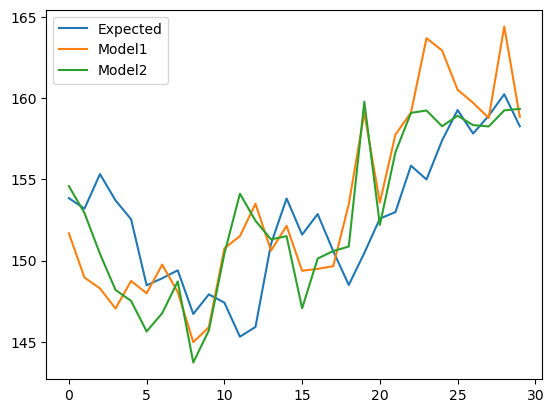

In [74]:

print(f'Basic Model Mean Absolute Error: {mae1:.3f}')
print(f'MultiVariable Model Mean Absolute Error: {mae2:.3f}')
plt.plot(y1,label='Expected')
plt.plot(ypred1,label='Model1')
plt.plot(ypred2,label='Model2')
plt.legend()
plt.show()


Model shows improved predictions with more features

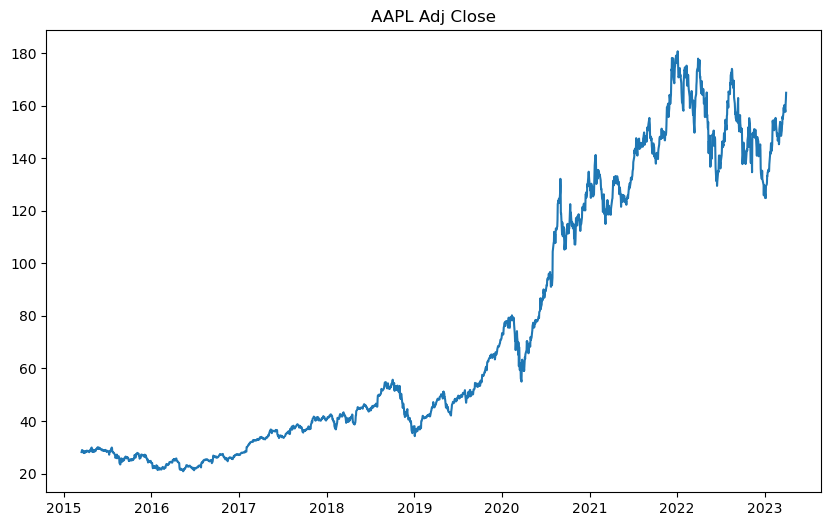

In [75]:
#Display Adjusted close data
plt.figure(figsize=(10,6))
plt.plot(data.index, data["Adj Close"])
plt.title(f"{ticker_symbol} Adj Close")
plt.show()

## Daily Return Test

In [76]:
X3 = data['daily_ret'].values.tolist()
X3 = helper.series_to_supervised(X3,5)

target = helper.series_to_supervised(data['daily_ret'].values.tolist(),5)
target = target['var1(t)']
X4 = helper.series_to_supervised(data,5,0)
X4['var1(t)']= target.values

In [77]:
mae3, y3, ypred3 = helper.walk_forward_validation(X3.values,30)
mae4, y4, ypred4 = helper.walk_forward_validation(X4.values,30)

expected=-0.8, predicted=0.9
expected=-2.7, predicted=-0.4
expected=0.3, predicted=1.4
expected=0.3, predicted=-1.2
expected=-1.8, predicted=-0.4
expected=0.8, predicted=-1.1
expected=-0.3, predicted=1.5
expected=-1.4, predicted=0.7
expected=0.4, predicted=0.4
expected=3.5, predicted=0.3
expected=1.9, predicted=0.4
expected=-1.4, predicted=0.0
expected=0.8, predicted=-0.9
expected=-1.5, predicted=0.9
expected=-1.4, predicted=0.6
expected=1.3, predicted=-0.6
expected=1.4, predicted=1.0
expected=0.3, predicted=-0.0
expected=1.9, predicted=-1.0
expected=-0.5, predicted=0.3
expected=1.5, predicted=-0.5
expected=1.2, predicted=-0.4
expected=-0.9, predicted=-1.4
expected=0.7, predicted=-1.2
expected=0.8, predicted=-0.4
expected=-1.2, predicted=0.6
expected=-0.4, predicted=-0.0
expected=2.0, predicted=-0.9
expected=1.0, predicted=1.8
expected=1.6, predicted=0.1
expected=-0.8, predicted=-0.1
expected=-2.7, predicted=-1.1
expected=0.3, predicted=0.8
expected=0.3, predicted=0.9
expected=-1.8, pr

In [78]:
print(f'Basic Model Mean Absolute Error: {mae3:.3f}')
print(f'Multivariable Model Mean Absolute Error: {mae4:.3f}')

Basic Model Mean Absolute Error: 1.565
Multivariable Model Mean Absolute Error: 1.436


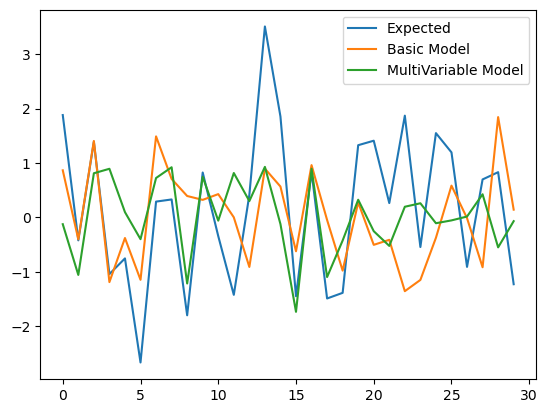

In [79]:
plt.plot(y3,label='Expected')
plt.plot(ypred3,label='Basic Model')
plt.plot(ypred4,label='MultiVariable Model')
plt.legend()
plt.show()

# Predict 7 days into the future

In [80]:
data.tail(10)

,Open,High,Low,Close,Adj Close,Volume,daily_ret,sma_7,sma_30,sma_50
Date,,,,,,,,,,
2023-03-20,155.070007,157.820007,154.149994,157.399994,157.399994,73641400,1.548383,153.257143,151.355378,146.525763
2023-03-21,157.320007,159.399994,156.539993,159.279999,159.279999,73938300,1.194412,154.797143,151.614755,147.122915
2023-03-22,159.300003,162.139999,157.809998,157.830002,157.830002,75701800,-0.910345,155.848572,151.728614,147.680483
2023-03-23,158.830002,161.550003,157.679993,158.929993,158.929993,67622100,0.696947,156.754286,151.970000,148.248469
2023-03-24,158.860001,160.339996,157.850006,160.250000,160.250000,59196500,0.830559,157.791428,152.290334,148.787739
2023-03-27,159.940002,160.770004,157.869995,158.279999,158.279999,52390300,-1.229330,158.138569,152.532667,149.289207
2023-03-28,157.970001,158.490005,155.979996,157.649994,157.649994,45992200,-0.398032,158.517140,152.659333,149.751116
2023-03-29,159.369995,161.050003,159.350006,160.770004,160.770004,51305700,1.979074,158.998570,152.911667,150.251861
2023-03-30,161.529999,162.470001,161.270004,162.360001,162.360001,49501700,0.988988,159.438570,153.146000,150.798983


In [81]:
#Remove last 7 days of data and repeat the new last day seven times to seperate test set
data_test = data.tail(5)
data_train = data.drop(data.tail(5).index)
data_train = data_train.append([data_train.iloc[-1]]*5, ignore_index=True)
data_train.tail(10)



C:\Users\darri\AppData\Local\Temp\ipykernel_15772\2166674041.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_train = data_train.append([data_train.iloc[-1]]*5, ignore_index=True)


,Open,High,Low,Close,Adj Close,Volume,daily_ret,sma_7,sma_30,sma_50
2017,155.070007,157.820007,154.149994,157.399994,157.399994,73641400.0,1.548383,153.257143,151.355378,146.525763
2018,157.320007,159.399994,156.539993,159.279999,159.279999,73938300.0,1.194412,154.797143,151.614755,147.122915
2019,159.300003,162.139999,157.809998,157.830002,157.830002,75701800.0,-0.910345,155.848572,151.728614,147.680483
2020,158.830002,161.550003,157.679993,158.929993,158.929993,67622100.0,0.696947,156.754286,151.970000,148.248469
2021,158.860001,160.339996,157.850006,160.250000,160.250000,59196500.0,0.830559,157.791428,152.290334,148.787739
2022,158.860001,160.339996,157.850006,160.250000,160.250000,59196500.0,0.830559,157.791428,152.290334,148.787739
2023,158.860001,160.339996,157.850006,160.250000,160.250000,59196500.0,0.830559,157.791428,152.290334,148.787739
2024,158.860001,160.339996,157.850006,160.250000,160.250000,59196500.0,0.830559,157.791428,152.290334,148.787739
2025,158.860001,160.339996,157.850006,160.250000,160.250000,59196500.0,0.830559,157.791428,152.290334,148.787739
2026,158.860001,160.339996,157.850006,160.250000,160.250000,59196500.0,0.830559,157.791428,152.290334,148.787739


In [82]:
target = helper.series_to_supervised(data['Adj Close'].values.tolist(),5)
target = target['var1(t)']
X5 = helper.series_to_supervised(data,5,0)
X5['var1(t)']= target.values
X5

,var1(t-5),var2(t-5),var3(t-5),var4(t-5),var5(t-5),var6(t-5),var7(t-5),var8(t-5),var9(t-5),var10(t-5),...,var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var1(t)
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-23,30.969999,31.237499,30.717501,31.237499,28.186207,143497200.0,1.100415,28.148502,28.338000,26.946952,...,32.099998,31.290001,31.475000,28.400509,274780400.0,-1.254888,28.419843,28.590144,27.312431,28.696014
2015-03-24,31.475000,31.830000,31.412500,31.760000,28.657663,204092400.0,1.672650,28.162680,28.404744,27.028792,...,31.962500,31.629999,31.802500,28.696014,150838800.0,1.040494,28.508785,28.652404,27.383533,28.578712
2015-03-25,31.750000,32.290001,31.592501,32.117500,28.980249,261083600.0,1.125654,28.205541,28.482091,27.130924,...,32.009998,31.639999,31.672501,28.578712,131369200.0,-0.408774,28.608684,28.704813,27.451750,27.832045
2015-03-26,32.187500,32.312500,31.850000,31.875000,28.761433,183238000.0,-0.755055,28.301895,28.545329,27.228635,...,31.705000,30.844999,30.844999,27.832045,206620800.0,-2.612671,28.558089,28.715040,27.517436,28.026043
2015-03-27,32.062500,32.099998,31.290001,31.475000,28.400509,274780400.0,-1.254888,28.419843,28.590144,27.312431,...,31.219999,30.650000,31.059999,28.026043,190291600.0,0.697032,28.467858,28.710227,27.582644,27.802723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-27,155.070007,157.820007,154.149994,157.399994,157.399994,73641400.0,1.548383,153.257143,151.355378,146.525763,...,160.339996,157.850006,160.250000,160.250000,59196500.0,0.830559,157.791428,152.290334,148.787739,158.279999
2023-03-28,157.320007,159.399994,156.539993,159.279999,159.279999,73938300.0,1.194412,154.797143,151.614755,147.122915,...,160.770004,157.869995,158.279999,158.279999,52390300.0,-1.229330,158.138569,152.532667,149.289207,157.649994
2023-03-29,159.300003,162.139999,157.809998,157.830002,157.830002,75701800.0,-0.910345,155.848572,151.728614,147.680483,...,158.490005,155.979996,157.649994,157.649994,45992200.0,-0.398032,158.517140,152.659333,149.751116,160.770004


In [83]:
trainX, trainy = X5.values[:, :-1], X5.values[:, -1]
trainy

array([ 28.6960144 ,  28.57871246,  27.8320446 , ..., 160.77000427,
       162.36000061, 164.8999939 ])

In [84]:
from xgboost import XGBRegressor
model = model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
model.fit(trainX, trainy)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [85]:

rows = X5.drop(columns='var1(t)')
#rows = helper.series_to_supervised(rows.values,7,0)
#rows = rows.values[-7:].flatten()
rows = rows[-1:]
rows

,var1(t-5),var2(t-5),var3(t-5),var4(t-5),var5(t-5),var6(t-5),var7(t-5),var8(t-5),var9(t-5),var10(t-5),...,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1)
Date,,,,,,,,,,,,,,,,,,,,,
2023-03-31,158.860001,160.339996,157.850006,160.25,160.25,59196500.0,0.830559,157.791428,152.290334,148.787739,...,161.529999,162.470001,161.270004,162.360001,162.360001,49501700.0,0.988988,159.43857,153.146,150.798983


In [86]:
from numpy import asarray
ypred = model.predict(asarray(rows))

In [87]:
ypred

array([164.89977], dtype=float32)

In [88]:
X5['var1(t)'].iloc[-1]

164.89999389648438

### Feature Corelation

In [89]:
import seaborn as sns
data.corr()

,Open,High,Low,Close,Adj Close,Volume,daily_ret,sma_7,sma_30,sma_50
Open,1.000000,0.999832,0.999798,0.999564,0.999526,-0.371599,-0.000234,0.999135,0.994805,0.991387
High,0.999832,1.000000,0.999767,0.999798,0.999770,-0.367510,0.007656,0.999173,0.995038,0.991740
Low,0.999798,0.999767,1.000000,0.999803,0.999762,-0.377088,0.009176,0.998956,0.994368,0.990956
Close,0.999564,0.999798,0.999803,1.000000,0.999963,-0.372592,0.019433,0.998898,0.994521,0.991221
Adj Close,0.999526,0.999770,0.999762,0.999963,1.000000,-0.373912,0.019076,0.998974,0.994743,0.991559
Volume,-0.371599,-0.367510,-0.377088,-0.372592,-0.373912,1.000000,-0.088265,-0.370016,-0.360887,-0.359933
daily_ret,-0.000234,0.007656,0.009176,0.019433,0.019076,-0.088265,1.000000,-0.005208,-0.008869,-0.008092
sma_7,0.999135,0.999173,0.998956,0.998898,0.998974,-0.370016,-0.005208,1.000000,0.996756,0.993517
sma_30,0.994805,0.995038,0.994368,0.994521,0.994743,-0.360887,-0.008869,0.996756,1.000000,0.998566
sma_50,0.991387,0.991740,0.990956,0.991221,0.991559,-0.359933,-0.008092,0.993517,0.998566,1.000000


<Axes: >

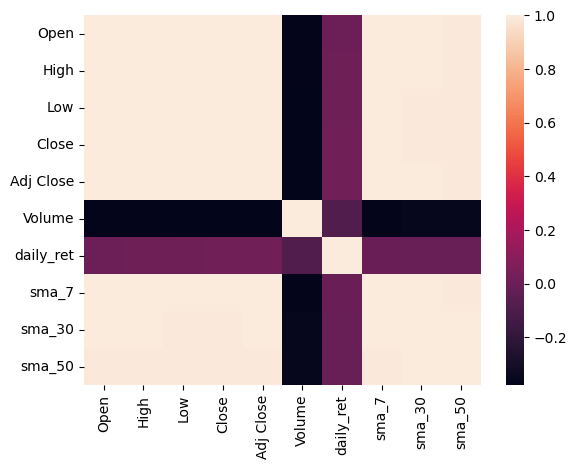

In [90]:
sns.heatmap(data.corr())

In [91]:
target = helper.series_to_supervised(data['daily_ret'].values.tolist(),5)
target = target['var1(t)']
feature = 'daily_ret'
data_w_lag = helper.series_to_supervised(data[feature].values.tolist(),5,0)
data_w_lag['target']= target.values
data_w_lag

,var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),target
5,1.100415,1.672650,1.125654,-0.755055,-1.254888,1.040494
6,1.672650,1.125654,-0.755055,-1.254888,1.040494,-0.408774
7,1.125654,-0.755055,-1.254888,1.040494,-0.408774,-2.612671
8,-0.755055,-1.254888,1.040494,-0.408774,-2.612671,0.697032
9,-1.254888,1.040494,-0.408774,-2.612671,0.697032,-0.796830
...,...,...,...,...,...,...
2022,1.548383,1.194412,-0.910345,0.696947,0.830559,-1.229330
2023,1.194412,-0.910345,0.696947,0.830559,-1.229330,-0.398032
2024,-0.910345,0.696947,0.830559,-1.229330,-0.398032,1.979074
2025,0.696947,0.830559,-1.229330,-0.398032,1.979074,0.988988


poor correlation between daily return and previous values

    var1(t-5)  var1(t-4)  var1(t-3)  var1(t-2)  var1(t-1)    target
5   30.969999  31.475000  31.750000  32.187500  32.062500  1.040494
6   31.475000  31.750000  32.187500  32.062500  31.780001 -0.408774
7   31.750000  32.187500  32.062500  31.780001  31.807501 -2.612671
8   32.187500  32.062500  31.780001  31.807501  31.635000  0.697032
9   32.062500  31.780001  31.807501  31.635000  30.690001 -0.796830
10  31.780001  31.807501  31.635000  30.690001  31.142500  2.531421
11  31.807501  31.635000  30.690001  31.142500  31.012501 -1.535158
12  31.635000  30.690001  31.142500  31.012501  31.522499 -0.144677
13  30.690001  31.142500  31.012501  31.522499  31.205000  0.861176
14  31.142500  31.012501  31.522499  31.205000  31.257500  1.619855


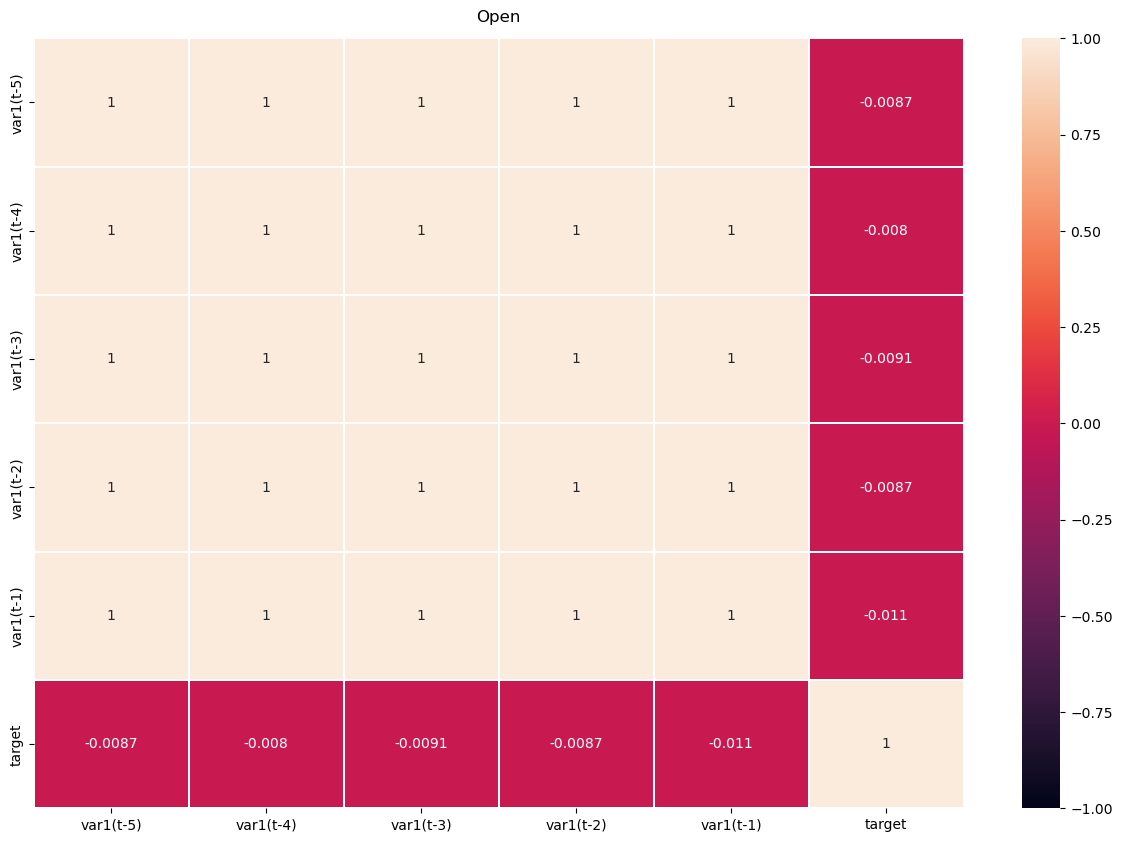

    var1(t-5)  var1(t-4)  var1(t-3)  var1(t-2)  var1(t-1)    target
5   31.237499  31.830000  32.290001  32.312500  32.099998  1.040494
6   31.830000  32.290001  32.312500  32.099998  31.962500 -0.408774
7   32.290001  32.312500  32.099998  31.962500  32.009998 -2.612671
8   32.312500  32.099998  31.962500  32.009998  31.705000  0.697032
9   32.099998  31.962500  32.009998  31.705000  31.219999 -0.796830
10  31.962500  32.009998  31.705000  31.219999  31.174999  2.531421
11  32.009998  31.705000  31.219999  31.174999  31.600000 -1.535158
12  31.705000  31.219999  31.174999  31.600000  31.622499 -0.144677
13  31.219999  31.174999  31.600000  31.622499  31.280001  0.861176
14  31.174999  31.600000  31.622499  31.280001  31.389999  1.619855


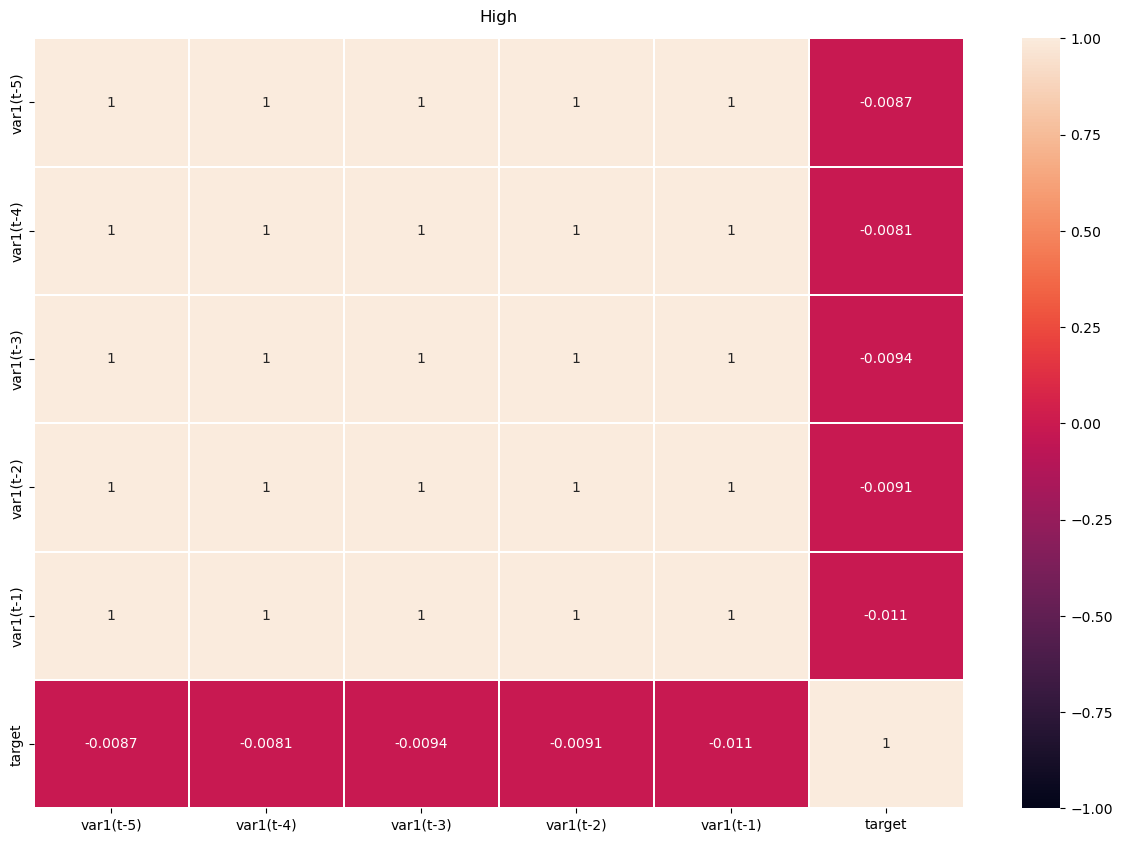

    var1(t-5)  var1(t-4)  var1(t-3)  var1(t-2)  var1(t-1)    target
5   30.717501  31.412500  31.592501  31.850000  31.290001  1.040494
6   31.412500  31.592501  31.850000  31.290001  31.629999 -0.408774
7   31.592501  31.850000  31.290001  31.629999  31.639999 -2.612671
8   31.850000  31.290001  31.629999  31.639999  30.844999  0.697032
9   31.290001  31.629999  31.639999  30.844999  30.650000 -0.796830
10  31.629999  31.639999  30.844999  30.650000  30.727501  2.531421
11  31.639999  30.844999  30.650000  30.727501  31.000000 -1.535158
12  30.844999  30.650000  30.727501  31.000000  31.090000 -0.144677
13  30.650000  30.727501  31.000000  31.090000  30.775000  0.861176
14  30.727501  31.000000  31.090000  30.775000  31.047501  1.619855


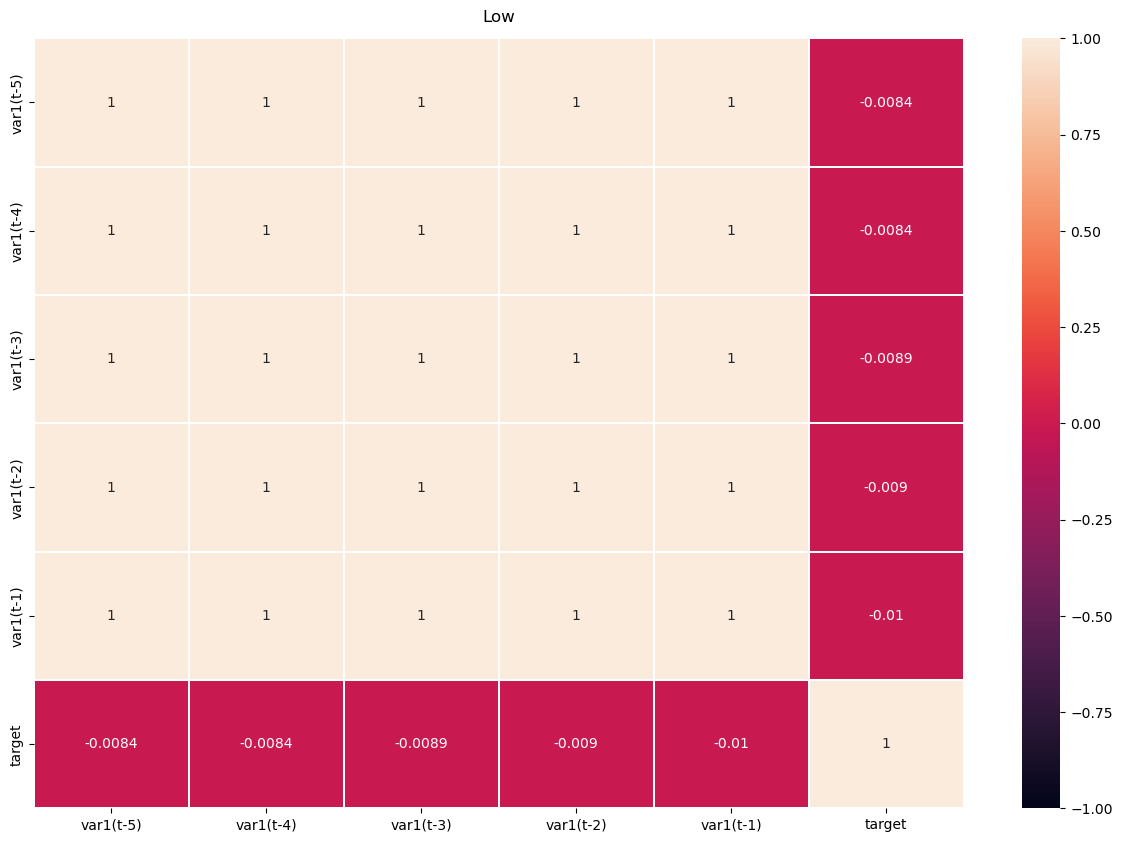

    var1(t-5)  var1(t-4)  var1(t-3)  var1(t-2)  var1(t-1)    target
5   31.237499  31.760000  32.117500  31.875000  31.475000  1.040494
6   31.760000  32.117500  31.875000  31.475000  31.802500 -0.408774
7   32.117500  31.875000  31.475000  31.802500  31.672501 -2.612671
8   31.875000  31.475000  31.802500  31.672501  30.844999  0.697032
9   31.475000  31.802500  31.672501  30.844999  31.059999 -0.796830
10  31.802500  31.672501  30.844999  31.059999  30.812500  2.531421
11  31.672501  30.844999  31.059999  30.812500  31.592501 -1.535158
12  30.844999  31.059999  30.812500  31.592501  31.107500 -0.144677
13  31.059999  30.812500  31.592501  31.107500  31.062500  0.861176
14  30.812500  31.592501  31.107500  31.062500  31.330000  1.619855


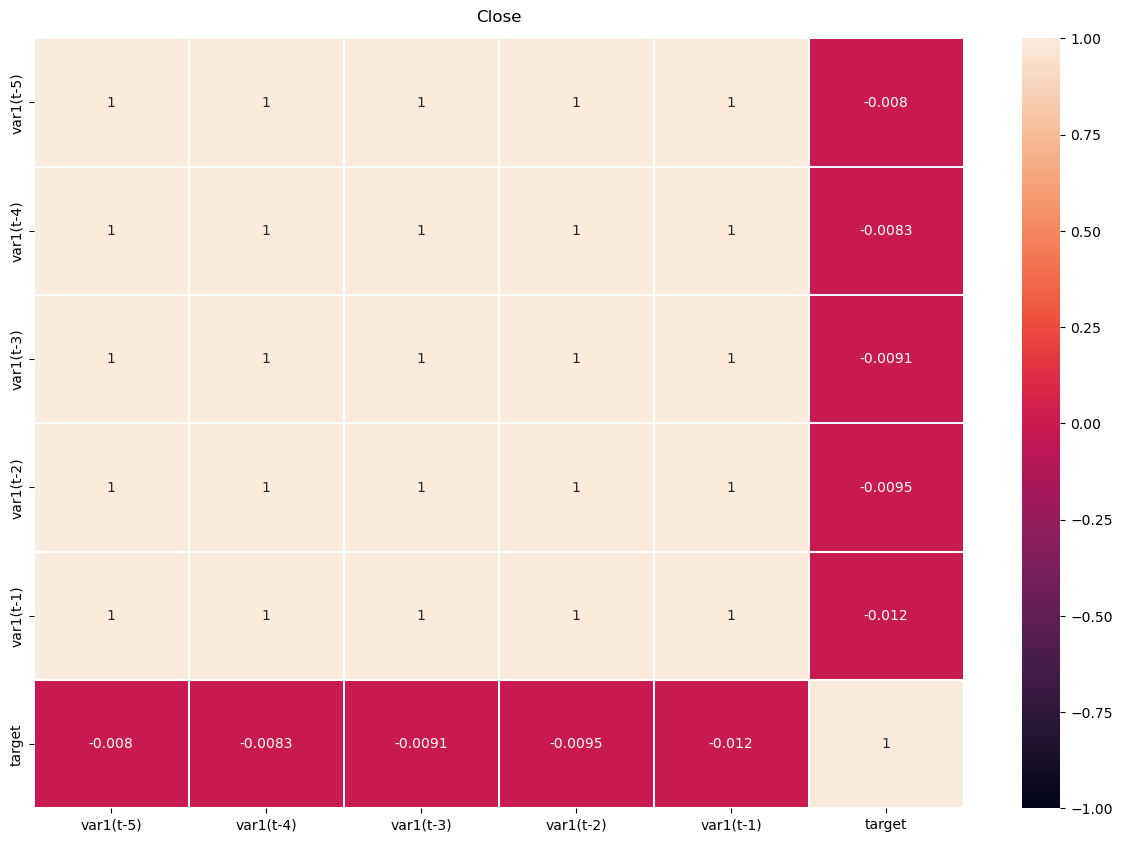

    var1(t-5)  var1(t-4)  var1(t-3)  var1(t-2)  var1(t-1)    target
5   28.186207  28.657663  28.980249  28.761433  28.400509  1.040494
6   28.657663  28.980249  28.761433  28.400509  28.696014 -0.408774
7   28.980249  28.761433  28.400509  28.696014  28.578712 -2.612671
8   28.761433  28.400509  28.696014  28.578712  27.832045  0.697032
9   28.400509  28.696014  28.578712  27.832045  28.026043 -0.796830
10  28.696014  28.578712  27.832045  28.026043  27.802723  2.531421
11  28.578712  27.832045  28.026043  27.802723  28.506527 -1.535158
12  27.832045  28.026043  27.802723  28.506527  28.068907 -0.144677
13  28.026043  27.802723  28.506527  28.068907  28.028297  0.861176
14  27.802723  28.506527  28.068907  28.028297  28.269670  1.619855


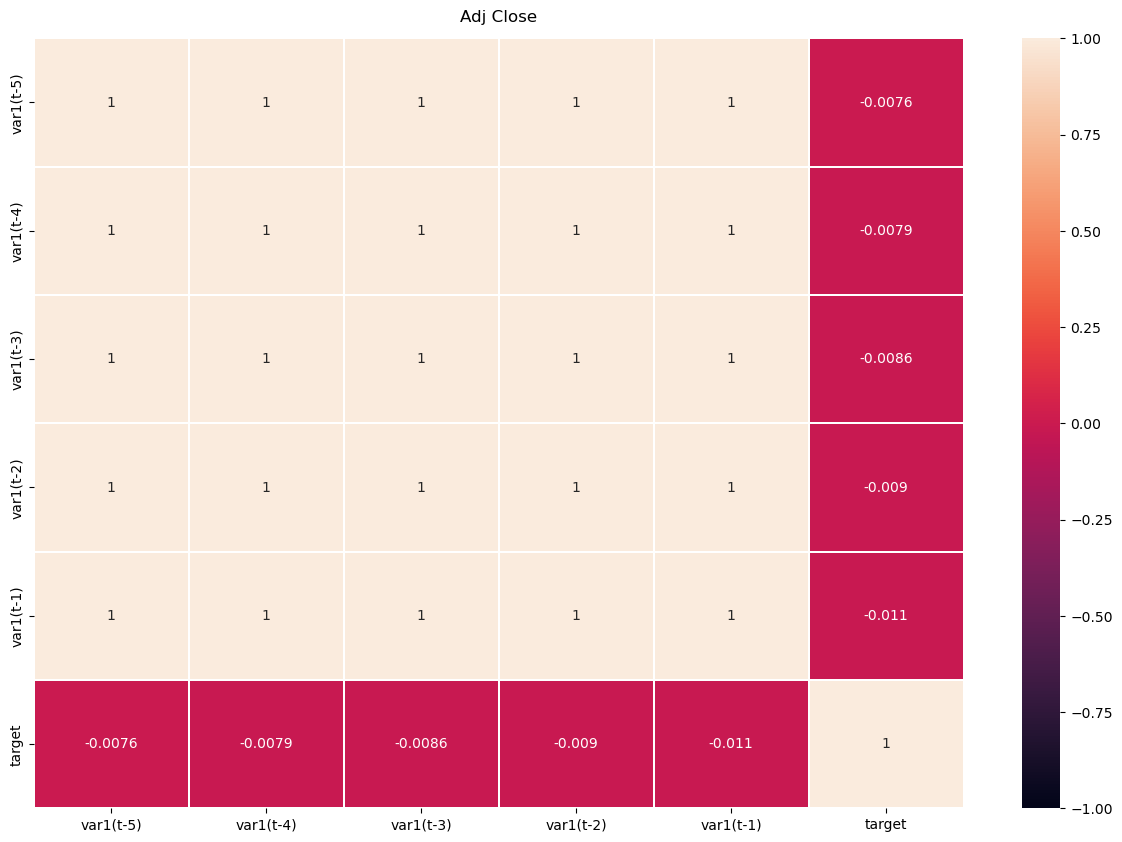

      var1(t-5)    var1(t-4)    var1(t-3)    var1(t-2)    var1(t-1)    target
5   143497200.0  204092400.0  261083600.0  183238000.0  274780400.0  1.040494
6   204092400.0  261083600.0  183238000.0  274780400.0  150838800.0 -0.408774
7   261083600.0  183238000.0  274780400.0  150838800.0  131369200.0 -2.612671
8   183238000.0  274780400.0  150838800.0  131369200.0  206620800.0  0.697032
9   274780400.0  150838800.0  131369200.0  206620800.0  190291600.0 -0.796830
10  150838800.0  131369200.0  206620800.0  190291600.0  158184800.0  2.531421
11  131369200.0  206620800.0  190291600.0  158184800.0  188398800.0 -1.535158
12  206620800.0  190291600.0  158184800.0  188398800.0  168362400.0 -0.144677
13  190291600.0  158184800.0  188398800.0  168362400.0  162485600.0  0.861176
14  158184800.0  188398800.0  168362400.0  162485600.0  128880400.0  1.619855


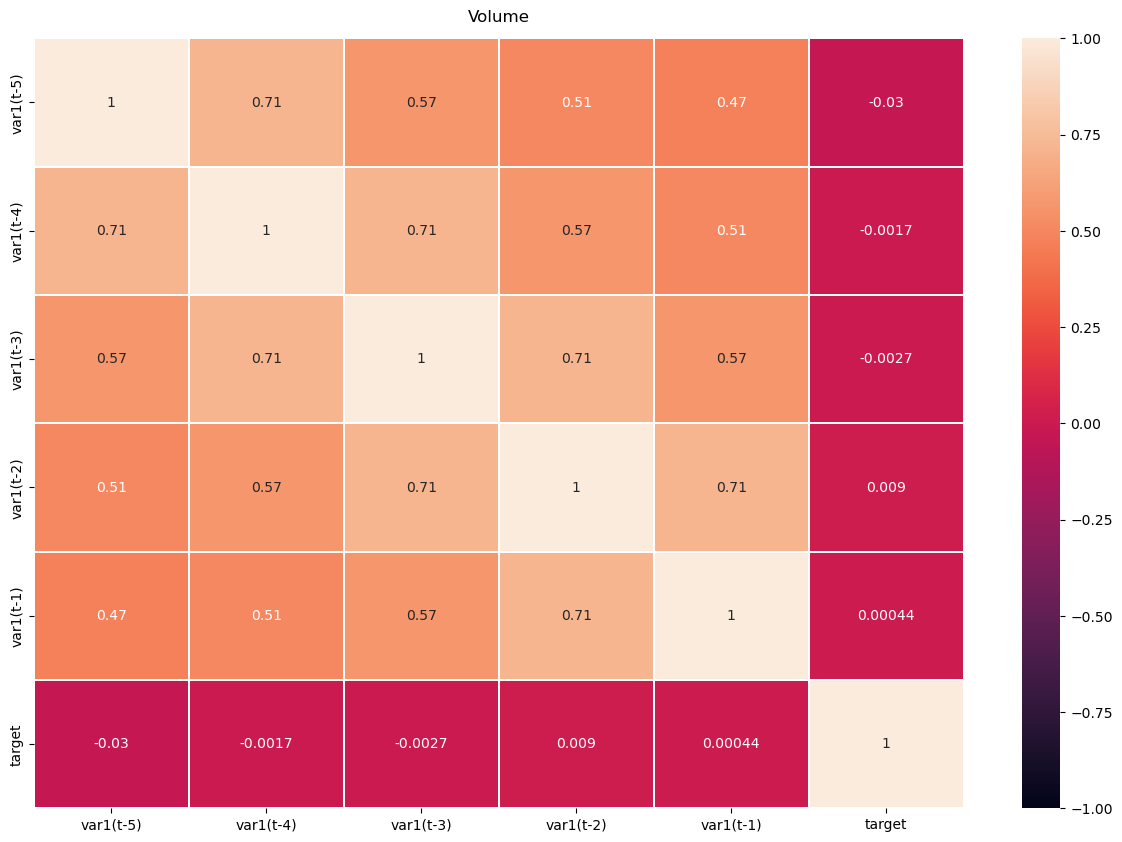

    var1(t-5)  var1(t-4)  var1(t-3)  var1(t-2)  var1(t-1)    target
5    1.100415   1.672650   1.125654  -0.755055  -1.254888  1.040494
6    1.672650   1.125654  -0.755055  -1.254888   1.040494 -0.408774
7    1.125654  -0.755055  -1.254888   1.040494  -0.408774 -2.612671
8   -0.755055  -1.254888   1.040494  -0.408774  -2.612671  0.697032
9   -1.254888   1.040494  -0.408774  -2.612671   0.697032 -0.796830
10   1.040494  -0.408774  -2.612671   0.697032  -0.796830  2.531421
11  -0.408774  -2.612671   0.697032  -0.796830   2.531421 -1.535158
12  -2.612671   0.697032  -0.796830   2.531421  -1.535158 -0.144677
13   0.697032  -0.796830   2.531421  -1.535158  -0.144677  0.861176
14  -0.796830   2.531421  -1.535158  -0.144677   0.861176  1.619855


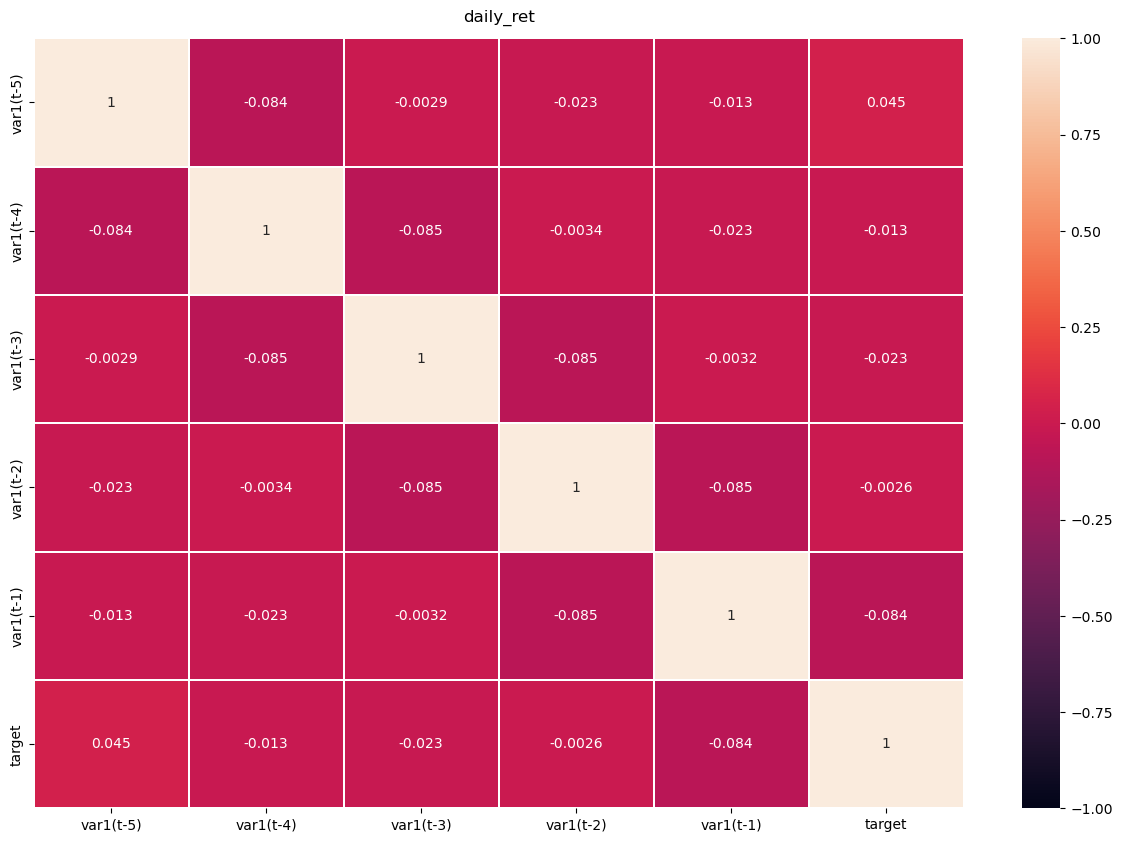

    var1(t-5)  var1(t-4)  var1(t-3)  var1(t-2)  var1(t-1)    target
5   28.148502  28.162680  28.205541  28.301895  28.419843  1.040494
6   28.162680  28.205541  28.301895  28.419843  28.508785 -0.408774
7   28.205541  28.301895  28.419843  28.508785  28.608684 -2.612671
8   28.301895  28.419843  28.508785  28.608684  28.558089  0.697032
9   28.419843  28.508785  28.608684  28.558089  28.467858 -0.796830
10  28.508785  28.608684  28.558089  28.467858  28.299640  2.531421
11  28.608684  28.558089  28.467858  28.299640  28.263225 -1.535158
12  28.558089  28.467858  28.299640  28.263225  28.215853 -0.144677
13  28.467858  28.299640  28.263225  28.215853  28.120465  0.861176
14  28.299640  28.263225  28.215853  28.120465  28.076316  1.619855


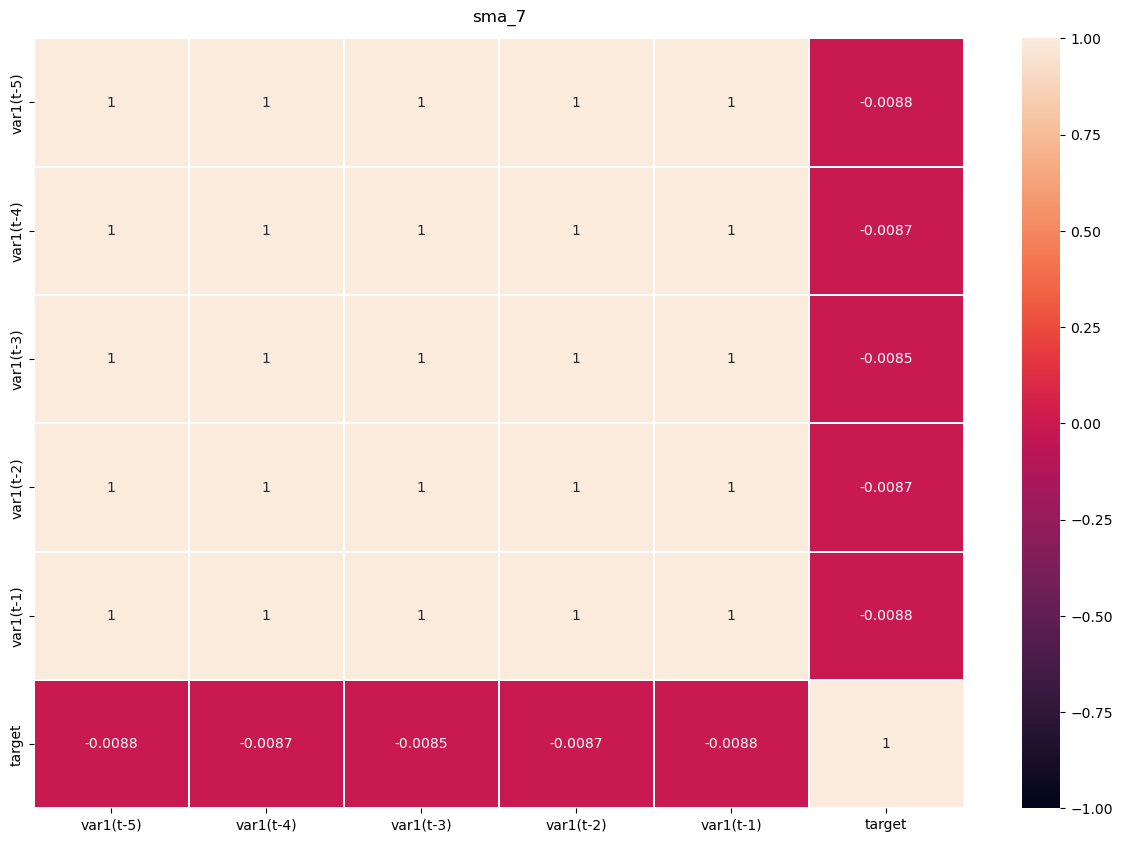

    var1(t-5)  var1(t-4)  var1(t-3)  var1(t-2)  var1(t-1)    target
5   28.338000  28.404744  28.482091  28.545329  28.590144  1.040494
6   28.404744  28.482091  28.545329  28.590144  28.652404 -0.408774
7   28.482091  28.545329  28.590144  28.652404  28.704813 -2.612671
8   28.545329  28.590144  28.652404  28.704813  28.715040  0.697032
9   28.590144  28.652404  28.704813  28.715040  28.710227 -0.796830
10  28.652404  28.704813  28.715040  28.710227  28.686090  2.531421
11  28.704813  28.715040  28.710227  28.686090  28.680751 -1.535158
12  28.715040  28.710227  28.686090  28.680751  28.655186 -0.144677
13  28.710227  28.686090  28.680751  28.655186  28.621574  0.861176
14  28.686090  28.680751  28.655186  28.621574  28.598039  1.619855


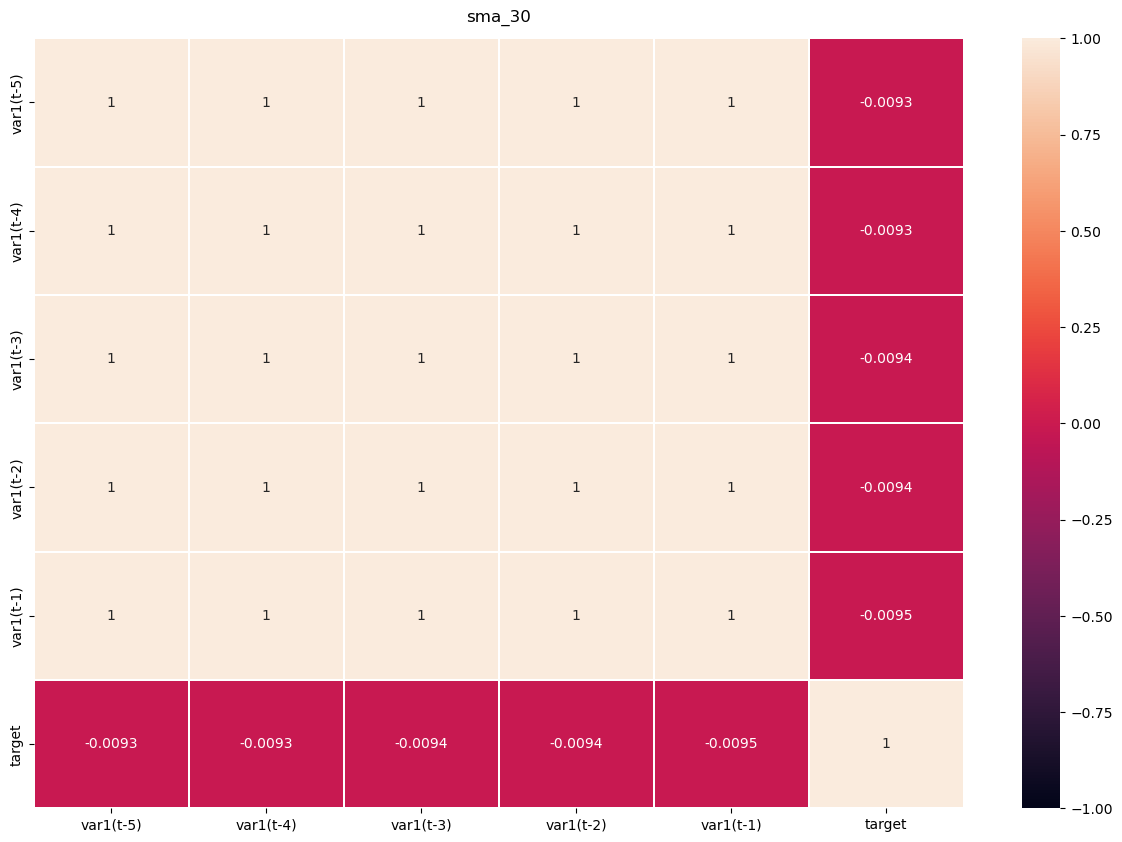

    var1(t-5)  var1(t-4)  var1(t-3)  var1(t-2)  var1(t-1)    target
5   26.946952  27.028792  27.130924  27.228635  27.312431  1.040494
6   27.028792  27.130924  27.228635  27.312431  27.383533 -0.408774
7   27.130924  27.228635  27.312431  27.383533  27.451750 -2.612671
8   27.228635  27.312431  27.383533  27.451750  27.517436  0.697032
9   27.312431  27.383533  27.451750  27.517436  27.582644 -0.796830
10  27.383533  27.451750  27.517436  27.582644  27.645272  2.531421
11  27.451750  27.517436  27.582644  27.645272  27.735369 -1.535158
12  27.517436  27.582644  27.645272  27.735369  27.820442 -0.144677
13  27.582644  27.645272  27.735369  27.820442  27.892436  0.861176
14  27.645272  27.735369  27.820442  27.892436  27.965526  1.619855


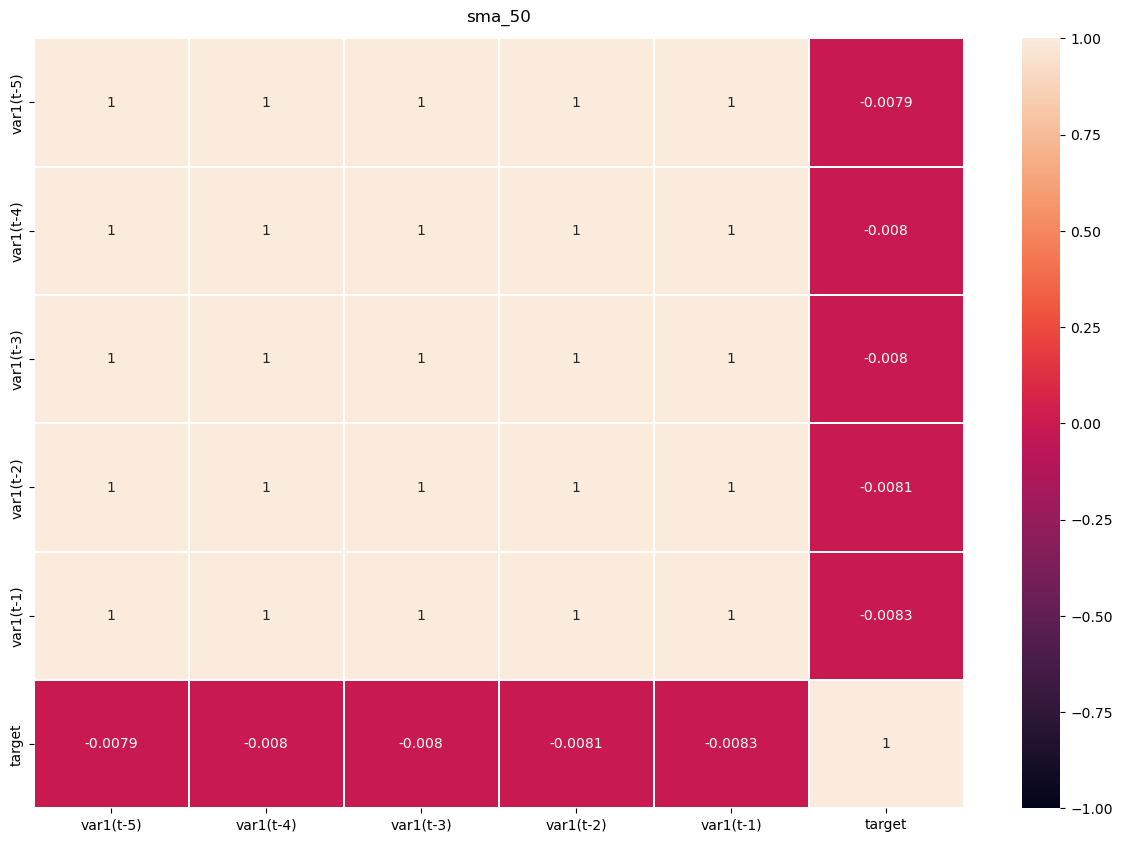

In [92]:
lag_steps = 5
target = helper.series_to_supervised(data['daily_ret'].values.tolist(),lag_steps)
target = target['var1(t)']
for feature in data.columns:
    data_w_lag = helper.series_to_supervised(data[feature].values.tolist(),lag_steps,0)
    data_w_lag['target']= target.values
    print(data_w_lag.head(10))
    fig, ax = plt.subplots(figsize=(15, 10))
    heatmap = sns.heatmap(data_w_lag.corr(), vmin=-1, vmax=1, annot=True, linewidths=.2)
    heatmap.set_title(feature, fontdict={'fontsize':12}, pad=12)
    plt.show()
